In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
Na = 100
Nb = 100

a = np.random.normal(0,1, Na)
b = np.random.normal(3,1, Nb)
labels = ['a']*Na + ['b']*Nb
df = pd.DataFrame({'label' : labels, 'val': np.hstack([a, b])})

<AxesSubplot:xlabel='label', ylabel='val'>

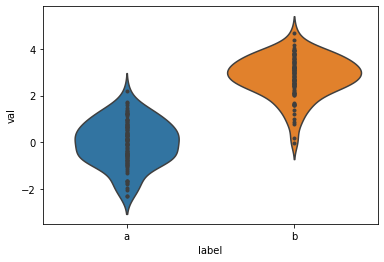

In [92]:
sns.violinplot(data=df, x='label', y='val', inner='point')

In [66]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = df['val'][:, None]
y = df['label'].replace({'a' : 0, 'b' : 1})

reg.fit(X, y)

<ipython-input-66-c877ad2c77df>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = df['val'][:, None]


LinearRegression()

In [67]:
reg.coef_

array([0.19150234])

In [68]:
w = [Nb]*Na + [Na]*Nb

In [80]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, y, sample_weight=w)

SVC()

In [81]:
yHat = clf.predict(X)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y, yHat)

0.68

In [99]:
def classification_accuracy_weighted(a, b):
    Na = len(a)
    Nb = len(b)
    assert (Na > 0) and (Nb > 0)
    
    x = np.hstack([a, b])[:, None]
    y = [0]*Na + [1]*Nb
    w = [Nb]*Na + [Na]*Nb
    clf = svm.SVC()
    clf.fit(x, y, sample_weight=w)
    yHat = clf.predict(x)
    return accuracy_score(y, yHat)

In [98]:
class_acc_weighted(a, b)

0.925